In [17]:
import matplotlib.pyplot as plt
from pickle import load, dump
import numpy as np
from scipy.stats import t
import os

path = os.getcwd()

# Original Results

In [2]:

K = {}
for sc in range(25):
    file = open(path+f"/Data/K/K_sc{sc}","rb")
    K[sc] = len(load(file)); file.close()

configs = {}
for i in range(31):
    file = open(path+f"/Results/Configurations/Objectives/objs_{i}","rb")
    configs[i] = load(file)
    


In [3]:
''' Configs plot '''
def plot_configs(data,K,SL=None,conf_level=0.95):
    feasible = []

    fig, ax = plt.subplots(figsize=(8,5))
    
    costs = [i*0.0025 for i in range(31)]
    for c in range(31):
        
        sls = np.array([(K[sc]-data[c][sc][1])/K[sc] for sc in range(25)])
        mu = np.mean(sls); sigma = np.std(sls,ddof=1)

        if mu >= 1:
            col="gold"; mark = "D"; feasible.append(c)
        else:
            col = "darkmagenta"; mark = "o"
            df = 25-1
            sem = sigma/5
            ci_lower, ci_upper = t.interval(conf_level, df, loc=mu, scale=sem)
            ax.vlines(x=[costs[c]],ymin=ci_lower,ymax=ci_upper,color=col)

        ax.plot(costs[c],mu,linestyle="",marker=mark,color=col)
    
    ax.set_ylabel("Expected Service Level", fontsize=14, fontname="Century Gothic")
    ax.set_xlabel("\nExpected driving and charging cost \n relative to minimum cost stations configuration",fontsize=14,fontname="Century Gothic")

    for tick in ax.get_xticklabels(): tick.set_fontname("Cambria")
    for tick in ax.get_yticklabels(): tick.set_fontname("Cambria")

    ax.set_xlim(-0.002,0.077)
    ax.set_ylim(0.989, 1.001)

    xticks = [i*0.0025 for i in range(0,31,5)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:.2%}".format(i) for i in xticks],fontsize=14)

    yticks = [0.98+i/1000 for i in range(0,21,2)]
    ax.set_yticks(yticks)
    ax.set_yticklabels(["{:.1%}".format(i) for i in yticks],fontsize=14)

    return feasible
    

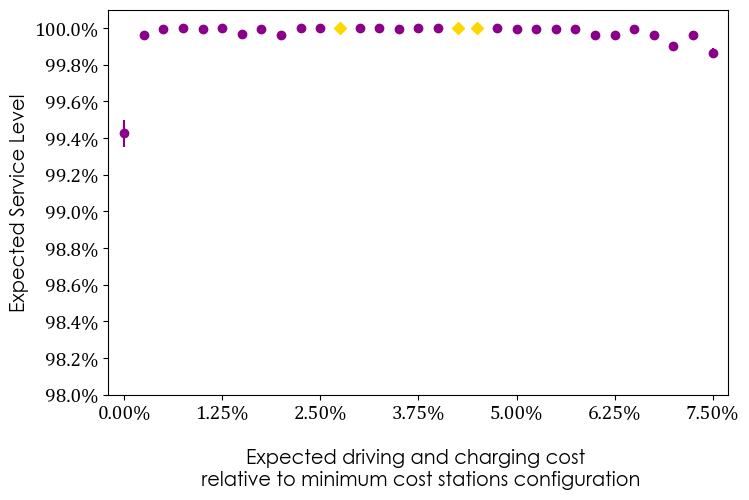

In [4]:
feasible = plot_configs(configs,K)

In [6]:
open_stats = {}
stress_ix = {}
coverage = {}

for i in range(31):
    file = open(path + f"/Results/Configurations/Open Stations/open_stations_{i}", "rb")
    open_stats[i] = load(file); file.close()

    file = open(path + f"/Results/Configurations/Stress Index/stress_index_{i}", "rb")
    stress_ix[i] = load(file); file.close()

    file = open(path + f"/Results/Configurations/Coverage/coverage_{i}", "rb")
    coverage[i] = load(file); file.close()


In [11]:
def plot_coverage(coverage,feasible,conf_level=0.95):
    fig, ax = plt.subplots(figsize=(8,5))
    
    for i in range(31):
        stress = [coverage[i][sc] for sc in range(25)]
        mu = np.mean(stress); sigma = np.std(stress, ddof=1)
        df = 25-1
        sem = sigma/5
        ci_lower, ci_upper = t.interval(conf_level, df, loc=mu, scale=sem)

        if i in feasible:
            mark = "D"; col = "gold"
        else:
            mark = "o"; col = "navy"

        ax.plot(i*0.0025,mu,marker=mark,color=col)
        ax.vlines(x=i*0.0025,ymin=ci_lower,ymax=ci_upper,color=col)

    
    ax.set_ylabel("Expected Average Vehicle Coverage", fontsize=14, fontname="Century Gothic")
    ax.set_xlabel("\nExpected driving and charging cost \n relative to minimum cost stations configuration",fontsize=14,fontname="Century Gothic")

    for tick in ax.get_xticklabels(): tick.set_fontname("Cambria")
    for tick in ax.get_yticklabels(): tick.set_fontname("Cambria")

    ax.set_xlim(-0.002,0.077)
    #ax.set_ylim(0.989, 1.001)

    xticks = [i*0.0025 for i in range(0,31,5)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:.1%}".format(i) for i in xticks],fontsize=14)

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

C:\Users\ari_r\AppData\Local\Temp\ipykernel_3172\1750235192.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


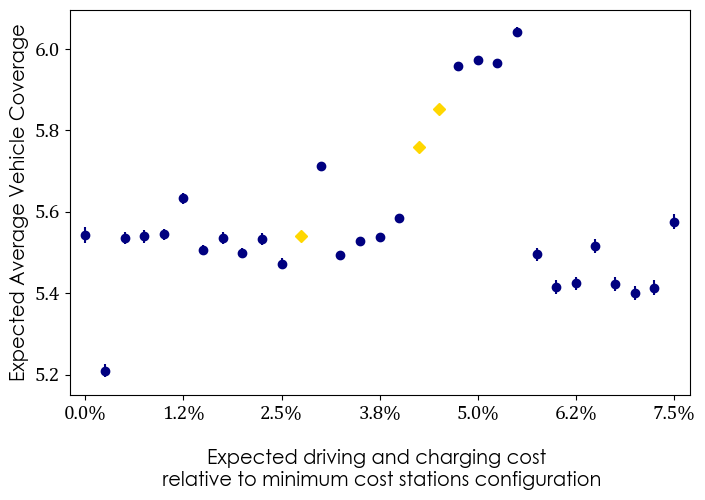

In [12]:
plot_coverage(coverage,feasible)

In [9]:
def violin_plots_stations(config1,config2,mi=None):
    
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,8))
    
    cols = {0:["deepskyblue","navy"],1:["greenyellow","olivedrab"],2:["gold","darkgoldenrod"],3:["darkorange","saddlebrown"],4:["hotpink","mediumvioletred"]}

    violins = {}
    col = 1

    stress = [sum(stress_ix[config1][sc][s] for sc in range(25))/25 for s in open_stats[config1]]
    violins[0] = ax.violinplot(dataset=stress,positions=[0],quantiles=[0.25,0.5,0.75],widths=[1.2],showextrema=False)
    
    ax.set_xticklabels([f"{sc}" for sc in range(25)])
    ax.set_ylabel("Number of feasible vehicles")
    
    violins[0]["bodies"][0].set_facecolor(cols[col][0])
    violins[0]["bodies"][0].set_edgecolor(cols[col][1])
    violins[0]["cquantiles"].set_edgecolor(cols[col][1])
    for b in violins[0]["bodies"]:
        m = np.mean(b.get_paths()[0].vertices[:,0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    for i in range(3):
        m = np.mean(violins[0]["cquantiles"].get_paths()[i].vertices[:,0])
        violins[0]["cquantiles"].get_paths()[i].vertices[:, 0] = np.clip(violins[0]["cquantiles"].get_paths()[i].vertices[:, 0], m, np.inf)

    col = 4
    stress = [sum(stress_ix[config2][sc][s] for sc in range(25))/25 for s in open_stats[config2]]
    violins[0] = ax.violinplot(dataset=stress,positions=[0],quantiles=[0.25,0.5,0.75],widths=[1.2],showextrema=False)
    
    ax.set_xticks([])
    ax.set_ylabel("Expected number of feasible vehicles by station",fontsize=14,fontname="Century Gothic")
    
    violins[0]["bodies"][0].set_facecolor(cols[col][0])
    violins[0]["bodies"][0].set_edgecolor(cols[col][1])
    violins[0]["cquantiles"].set_edgecolor(cols[col][1])
    for b in violins[0]["bodies"]:
        m = np.mean(b.get_paths()[0].vertices[:,0])
        b.get_paths()[0].vertices[:, 0] = np.clip(-np.inf,m,b.get_paths()[0].vertices[:, 0])
    for i in range(3):
        m = np.mean(violins[0]["cquantiles"].get_paths()[i].vertices[:,0])
        violins[0]["cquantiles"].get_paths()[i].vertices[:, 0] = np.clip(-np.inf,m,violins[0]["cquantiles"].get_paths()[i].vertices[:, 0])

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14,fontname="Cambria")

    return ax




C:\Users\ari_r\AppData\Local\Temp\ipykernel_3172\368011317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{sc}" for sc in range(25)])
C:\Users\ari_r\AppData\Local\Temp\ipykernel_3172\368011317.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14,fontname="Cambria")


<AxesSubplot: ylabel='Expected number of feasible vehicles by station'>

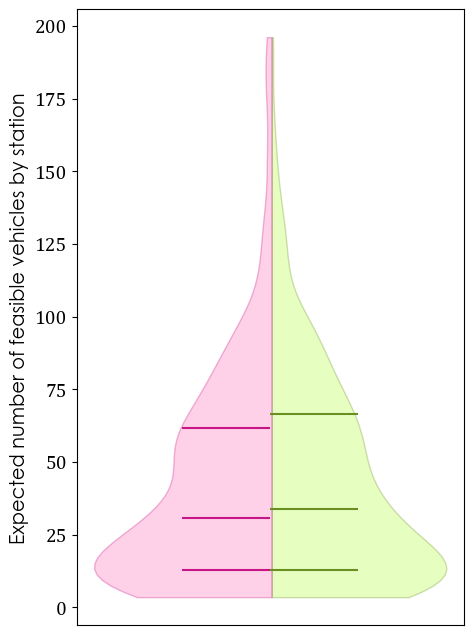

In [10]:
violin_plots_stations(18,0)


# MultiObjective Results

In [33]:
epsilons = [0.0,0.00005,0.00055,0.00165,0.0033,0.005,0.007,0.01,0.0125,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.3434633262557294]

In [34]:
cov = dict(); cost = dict(); objs = dict()
for e in epsilons:
    file = open(path+f"/Multiobjective/Configurations/Costs/costs_{e}","rb")
    cost[e] = load(file); file.close()

    file = open(path+f"/Multiobjective/Configurations/Coverage/coverage_{e}","rb")
    covs = load(file); file.close()
    cov[e] = sum(covs.values())/25

    file = open(path+f"/Multiobjective/Configurations/Objectives/objs_{e}","rb")
    objs[e] = load(file); file.close()


In [35]:
def plot_pareto_frontier(cov,cost,objs):

    fig, ax = plt.subplots(figsize=(8,4),nrows=1,ncols=1)

    for e in epsilons:
        infeasible = sum(objs[e][sc][1] for sc in range(25))
        if infeasible == 0: col = "goldenrod"
        else: col = "darkmagenta"
        ax.plot(cov[e],cost[e],marker="o",color=col,linestyle="")
    
    ax.set_ylabel("Expected Driving\nand Charging Cost",fontsize=14)
    ax.set_xlabel("Expected Average Coverage by Vehicle",fontsize=14)



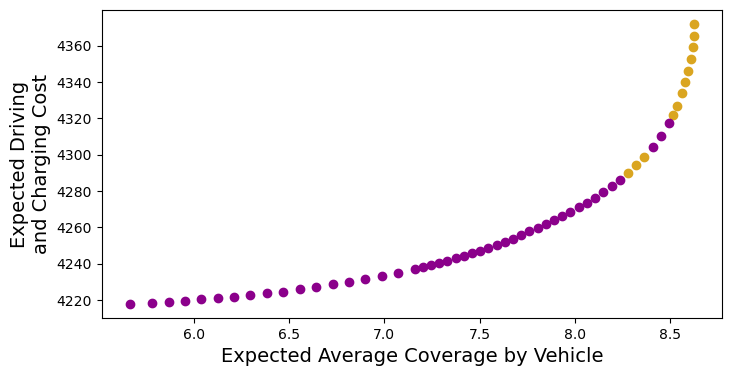

In [36]:
plot_pareto_frontier(cov,cost,objs)